In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

'''signal and background files obtained from running 
/cluster/home/amyrewoldt/21.2.48/run/MVA_3lep.py for ttb and 800 H+ signal file'''

#sig_file = "/cluster/home/amyrewoldt/21.2.48/sig500.csv"
#sig_file = "/cluster/home/amyrewoldt/21.2.48/sig600.csv"
#sig_file = "/cluster/home/amyrewoldt/21.2.48/sig700.csv"
sig_file = "/cluster/home/amyrewoldt/21.2.48/sig800-allvar.csv"
#sig_file = "/cluster/home/amyrewoldt/21.2.48/sig1000.csv"
bkg_file = "/cluster/home/amyrewoldt/21.2.48/bkg-allvar.csv"

In [2]:
#variables that are distict when comparing sm to mssm process
#variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","lepton1_pdgId","lepton2_pdgId","lepton3_pdgId"]
#variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","MET_phi","lepton1_flavor", "lepton2_flavor", "lepton3_flavor","lepton1_charge","lepton2_charge","lepton3_charge"]
variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","MET_phi","lepton1_flavor", "lepton2_flavor", "lepton3_flavor","lepton1_charge","lepton2_charge","lepton3_charge","visible_pt","transverse_mass","dilep_mass","dilep_DR"]
#add DR, check lepton pt for bkg

In [3]:
#read signal files
df_sig = pd.read_csv(sig_file,index_col=0)
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [4]:
#tagging signal as 1
df_sig["signal"] = 1
df_sig

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,136034.546132,15946.349741,10098.030800,-0.614244,-1.669962,-0.927611,2.890116,0.171325,-1.701491,123768.832076,...,11,11,1,1,-1,120326.067646,314970.450347,56695.567185,1.720359,1
1,61646.166342,14181.131880,12484.898062,-1.495198,-0.027455,0.296358,0.746144,-1.572187,-0.473253,163114.452533,...,11,13,-1,-1,1,60492.884939,309615.482133,56695.567185,1.720359,1
2,81590.973653,15342.552200,5004.168957,-0.040768,0.759685,-1.458187,-2.038976,-2.085293,0.974414,190778.456166,...,11,11,-1,1,-1,91953.997650,303759.822724,29129.130745,0.801793,1
3,32642.536159,24142.879938,12325.398250,-0.136986,0.939391,1.317908,-1.047662,-1.588286,1.983586,78533.745330,...,11,11,-1,1,-1,42556.473045,166273.217822,35063.927202,1.204518,1
4,58125.163709,47247.979479,10958.887806,0.713574,-1.388995,0.968815,3.072501,0.334295,-2.095577,64799.181452,...,13,11,1,-1,-1,21348.086420,253581.309984,27478.120469,1.143946,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,44974.249533,40437.158679,30047.066311,1.193133,1.404438,0.131170,-0.883634,1.737835,-1.943373,291772.423374,...,13,11,-1,-1,1,25328.886290,467284.753102,41898.564343,1.506551,1
9995,105238.017161,5086.408890,975.069575,-0.797600,-1.995695,-0.724906,-1.653885,-1.412610,0.153791,145219.672995,...,11,11,-1,1,-1,109969.551696,284711.443685,29929.827832,1.222148,1
9996,164494.548648,24622.120561,5645.133503,-0.473669,-0.675226,0.525978,2.315153,-0.208446,-1.912509,358186.262669,...,11,11,1,1,-1,142098.802036,570409.703583,61077.053325,2.285710,1
9997,188242.360868,3932.680822,2706.965077,-0.284036,-0.978783,2.288501,-0.165836,0.044499,3.021078,130948.174366,...,11,11,-1,1,-1,189385.471972,343290.720129,20113.619721,0.725889,1


In [5]:
#tagging bkg as 0
df_bkg["signal"] = 0
df_bkg

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,60432.759206,1772.358160,159.131793,0.138424,0.075263,0.077342,2.575995,0.972738,0.949069,80650.155730,...,11,11,1,-1,1,60397.163158,143345.864336,12.753173,0.023759,0
1,36174.190718,310.765612,140.590344,2.099155,-0.367137,-5.934981,2.862712,-2.033935,-1.288567,11138.107907,...,11,11,1,-1,-1,36158.808554,145604.343214,12.753173,0.023759,0
2,114977.920099,134.964779,36.187926,-1.523502,-5.123272,-5.141090,-1.039730,1.693699,1.697745,31730.719436,...,11,11,-1,1,-1,114820.789565,182756.715142,24427.829852,4.519953,0
3,6726.094162,4705.184257,726.458014,2.599949,-0.449780,3.488534,-0.910471,-3.129180,0.522366,101448.067016,...,11,11,-1,-1,1,5008.424333,154672.738458,13471.895051,4.736649,0
4,74073.895915,166.976275,95.919963,0.319539,0.923414,0.742593,-0.594181,0.105200,-0.050175,24368.822529,...,11,11,1,1,-1,74283.912383,99698.087175,30.201797,0.238406,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,85065.632368,7213.833015,3977.776861,1.339779,0.390503,2.218237,-2.282194,-0.784568,-0.349236,20999.143602,...,13,11,1,-1,1,84888.246979,138195.730944,41636.684741,1.773135,0
8021,76554.309833,40186.730760,6965.474386,1.616779,1.782972,-0.654489,1.499232,2.394502,-1.349433,33281.332649,...,11,11,1,-1,-1,99444.343420,213085.715589,41636.684741,1.773135,0
8022,34711.249396,13428.798238,3187.242556,0.313619,-0.390401,1.051292,-2.210765,2.856821,1.514196,75273.879691,...,11,11,1,1,-1,39424.229783,130930.081247,21654.563164,2.662456,0
8023,32606.547319,21284.908214,394.194972,-0.164624,0.533897,6.257568,2.145774,2.538367,2.798893,16841.370746,...,11,11,-1,1,1,53249.148378,139347.344656,21654.563164,2.662456,0


lepton1_pt


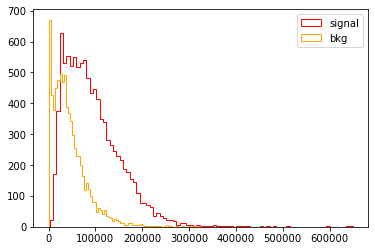

lepton2_pt


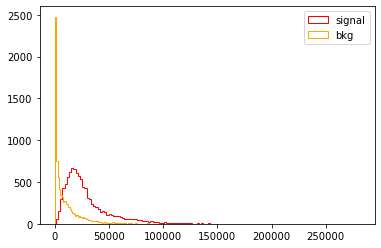

lepton3_pt


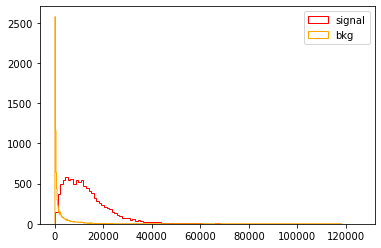

lepton1_eta


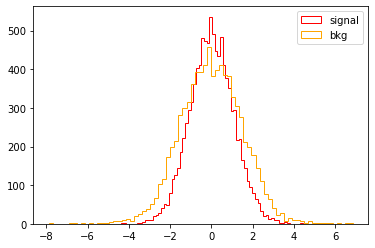

lepton2_eta


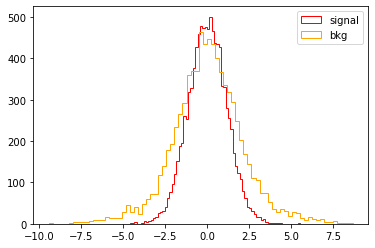

lepton3_eta


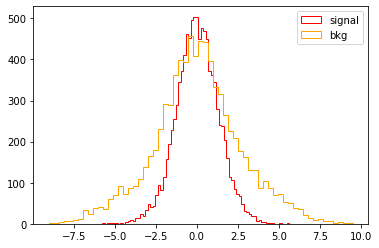

lepton1_phi


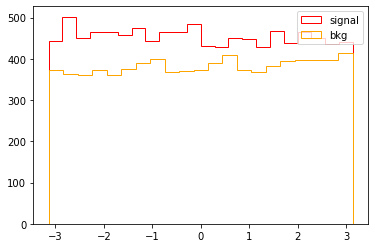

lepton2_phi


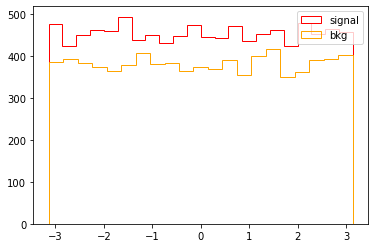

lepton3_phi


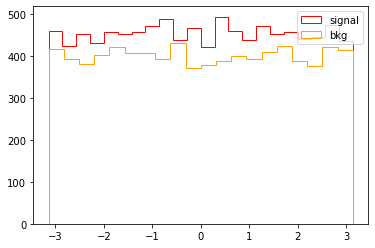

MET


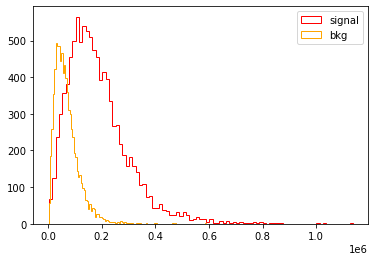

MET_phi


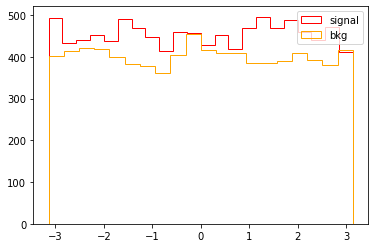

lepton1_flavor


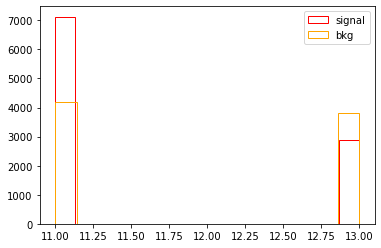

lepton2_flavor


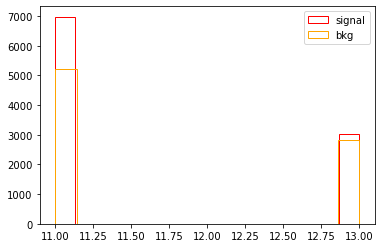

lepton3_flavor


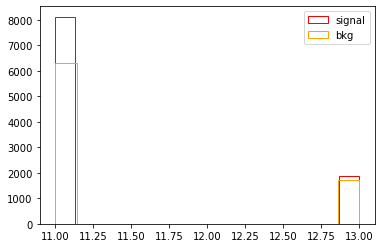

lepton1_charge


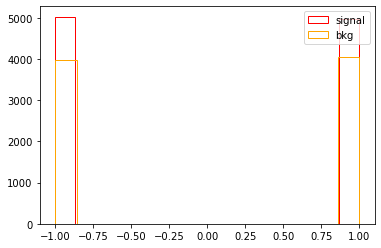

lepton2_charge


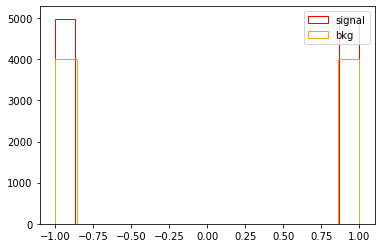

lepton3_charge


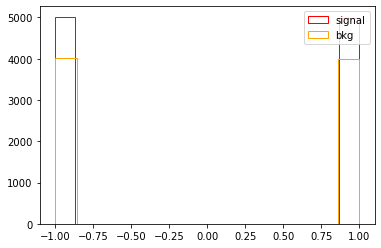

visible_pt


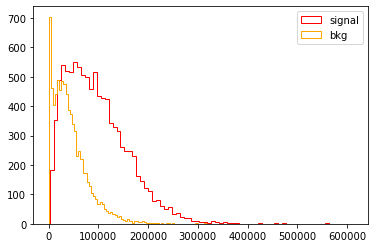

transverse_mass


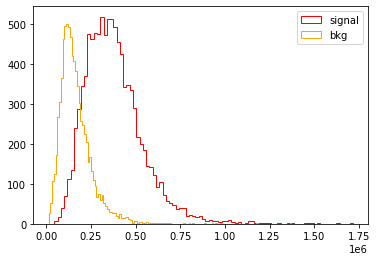

dilep_mass


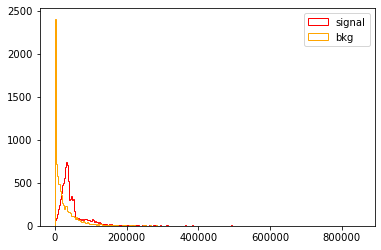

dilep_DR


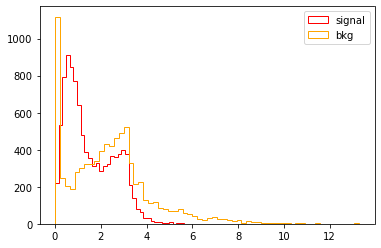

signal


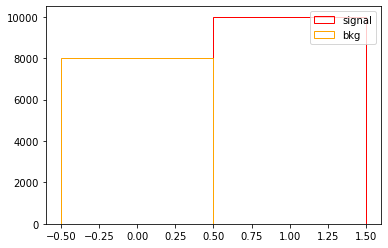

In [6]:
#overlay signal and background for variables list
for var in df_sig.columns:
    print(var)
    plt.figure()
    plt.hist(df_sig[var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
    plt.hist(df_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [7]:
#standardize stuff function
min_max_scaler = preprocessing.MinMaxScaler()

def standardize_stuff(n):
    return (n - n.min())/(n.max() - n.min())

In [8]:
#standardize signal stuff
series_list = []
for var in df_sig.columns:
    print(var)
    if var == "signal":
        series_list.append(df_sig[var])
        continue
#    if "flavor" or "charge" in var:
#        series_list.append(df_sig[var])
#        continue
    print (df_sig[var])
    print (df_sig[var].min())
    print (df_sig[var].max())
    print (standardize_stuff(df_sig[var]))
    print (series_list.append((df_sig[var] - df_sig[var].min())/(df_sig[var].max() - df_sig[var].min())))

df_norm_sig = pd.DataFrame(series_list).T

lepton1_pt
0       136034.546132
1        61646.166342
2        81590.973653
3        32642.536159
4        58125.163709
            ...      
9994     44974.249533
9995    105238.017161
9996    164494.548648
9997    188242.360868
9998     92951.385865
Name: lepton1_pt, Length: 9999, dtype: float64
2199.075885092817
649914.4369784639
0       0.206627
1       0.091780
2       0.122572
3       0.047001
4       0.086344
          ...   
9994    0.066040
9995    0.159081
9996    0.250566
9997    0.287230
9998    0.140111
Name: lepton1_pt, Length: 9999, dtype: float64
None
lepton2_pt
0       15946.349741
1       14181.131880
2       15342.552200
3       24142.879938
4       47247.979479
            ...     
9994    40437.158679
9995     5086.408890
9996    24622.120561
9997     3932.680822
9998    26210.345261
Name: lepton2_pt, Length: 9999, dtype: float64
878.6826496818755
280923.82015338703
0       0.053804
1       0.047501
2       0.051648
3       0.083073
4       0.165578
          ... 

In [9]:
#standardize bkg stuff
series_list_bkg = []
for var in df_bkg.columns:
    print(var)
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
#    if "flavor" or "charge" in var:
#        series_list_bkg.append(df_bkg[var])
#        continue
    print (df_sig[var])
    print(df_bkg[var].min())
    print(df_bkg[var].max())
    print (standardize_stuff(df_sig[var]))
    print (series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min())))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton1_pt
0       136034.546132
1        61646.166342
2        81590.973653
3        32642.536159
4        58125.163709
            ...      
9994     44974.249533
9995    105238.017161
9996    164494.548648
9997    188242.360868
9998     92951.385865
Name: lepton1_pt, Length: 9999, dtype: float64
41.53723943871653
323240.0279824057
0       0.206627
1       0.091780
2       0.122572
3       0.047001
4       0.086344
          ...   
9994    0.066040
9995    0.159081
9996    0.250566
9997    0.287230
9998    0.140111
Name: lepton1_pt, Length: 9999, dtype: float64
None
lepton2_pt
0       15946.349741
1       14181.131880
2       15342.552200
3       24142.879938
4       47247.979479
            ...     
9994    40437.158679
9995     5086.408890
9996    24622.120561
9997     3932.680822
9998    26210.345261
Name: lepton2_pt, Length: 9999, dtype: float64
6.437711598224528
264176.89704024
0       0.053804
1       0.047501
2       0.051648
3       0.083073
4       0.165578
          ...   


In [10]:
df_norm_bkg

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,0.186855,0.006685,0.001342,0.544573,0.525425,0.491514,0.909965,0.654779,0.651089,0.134813,...,0.0,0.0,1.0,0.0,1.0,0.190795,0.096515,0.000348,0.001785,0.0
1,0.111797,0.001152,0.001186,0.677497,0.501016,0.167163,0.955614,0.176183,0.294901,0.016548,...,0.0,0.0,1.0,0.0,0.0,0.114188,0.098176,0.000348,0.001785,0.0
2,0.355622,0.000487,0.000304,0.431906,0.238603,0.209991,0.334281,0.769541,0.770263,0.051584,...,0.0,0.0,0.0,1.0,0.0,0.362805,0.125503,0.034018,0.340072,0.0
3,0.020683,0.017787,0.006135,0.711447,0.496457,0.675541,0.354861,0.001844,0.583166,0.170198,...,0.0,0.0,0.0,0.0,1.0,0.015735,0.104846,0.018909,0.356376,0.0
4,0.229062,0.000608,0.000808,0.556851,0.572221,0.527403,0.405220,0.516686,0.492029,0.039059,...,0.0,0.0,1.0,1.0,0.0,0.234685,0.064410,0.000372,0.017935,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,0.263071,0.027283,0.033598,0.626016,0.542818,0.607011,0.136460,0.375055,0.444424,0.033326,...,1.0,0.0,1.0,0.0,1.0,0.268201,0.092727,0.057750,0.133406,0.0
8021,0.236736,0.152100,0.058835,0.644795,0.619646,0.452034,0.738526,0.881093,0.285213,0.054222,...,0.0,0.0,1.0,0.0,0.0,0.314206,0.147811,0.057750,0.133406,0.0
8022,0.107271,0.050809,0.026921,0.556450,0.499733,0.544057,0.147833,0.954684,0.741045,0.125666,...,0.0,0.0,1.0,1.0,0.0,0.124508,0.087383,0.030193,0.200317,0.0
8023,0.100759,0.080548,0.003328,0.524029,0.550730,0.824924,0.841466,0.903993,0.945544,0.026252,...,0.0,0.0,0.0,1.0,1.0,0.168203,0.093574,0.030193,0.200317,0.0


lepton1_pt


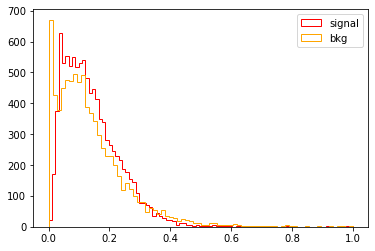

lepton2_pt


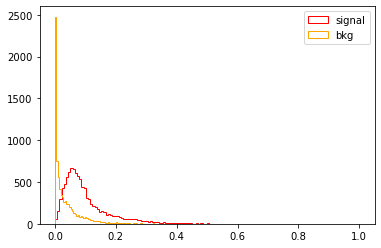

lepton3_pt


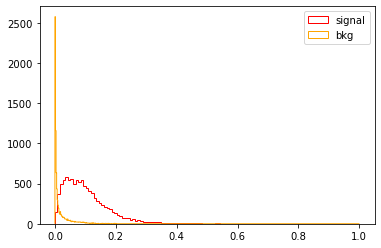

lepton1_eta


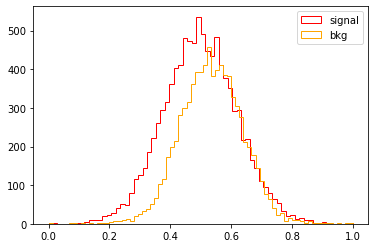

lepton2_eta


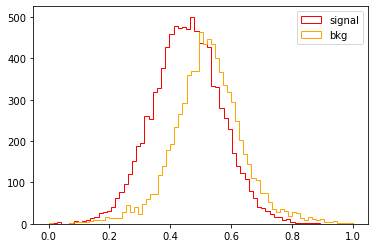

lepton3_eta


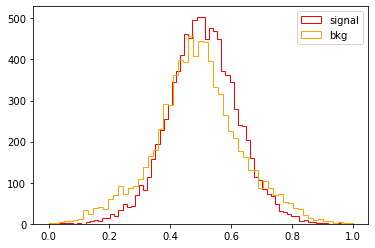

lepton1_phi


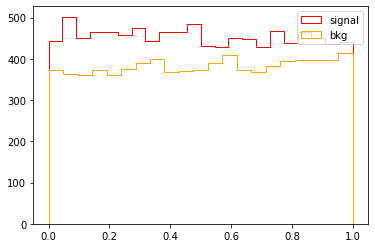

lepton2_phi


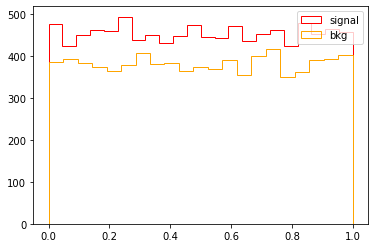

lepton3_phi


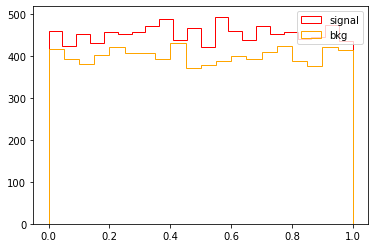

MET


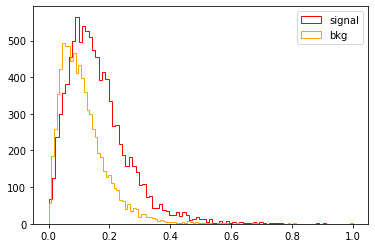

MET_phi


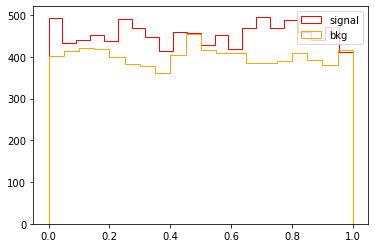

lepton1_flavor


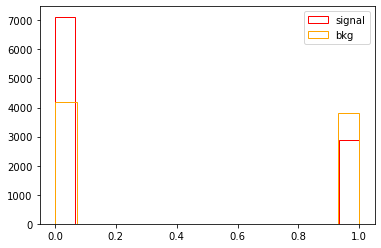

lepton2_flavor


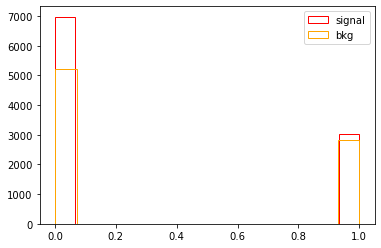

lepton3_flavor


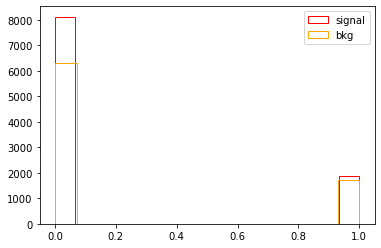

lepton1_charge


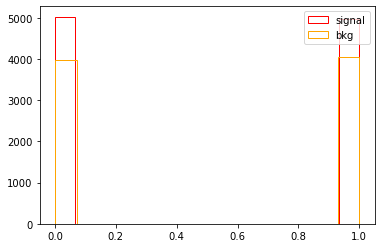

lepton2_charge


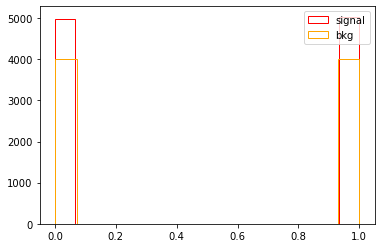

lepton3_charge


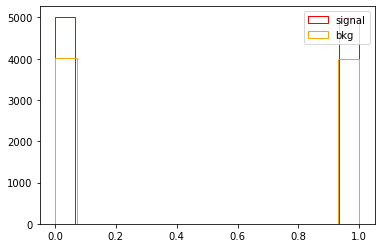

visible_pt


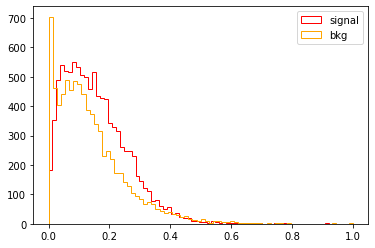

transverse_mass


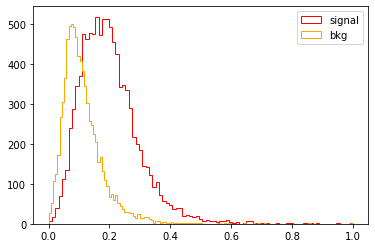

dilep_mass


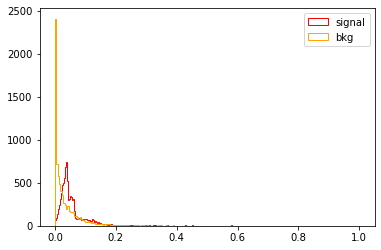

dilep_DR


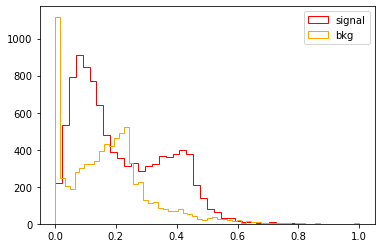

signal


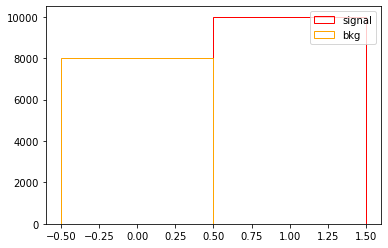

In [11]:
#Overlay standardized signal and bkg
for var in df_sig.columns:
    print(var)
    plt.figure()
    plt.hist(df_norm_sig[var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
    plt.hist(df_norm_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [65]:
#using 80% of the (signal + bkg) data for training and the rest for test

n_bkg = int(8026*80/100)
n_sig = int(9999*80/100)

df_train = pd.concat([df_norm_sig.iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test =  pd.concat([df_norm_sig.iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)

#Reindex [0:n]
x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)

x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)

lepton1_pt


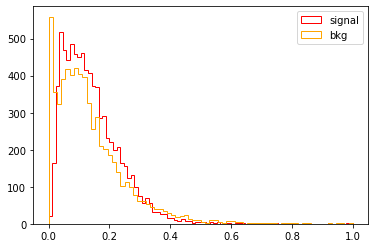

lepton2_pt


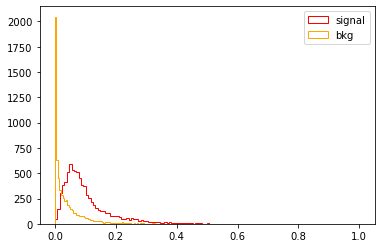

lepton3_pt


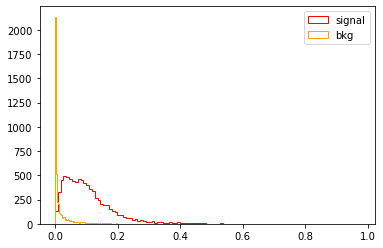

lepton1_eta


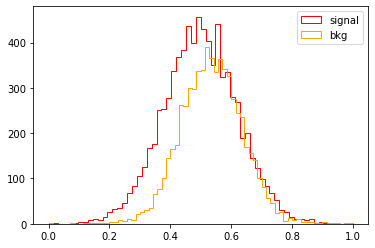

lepton2_eta


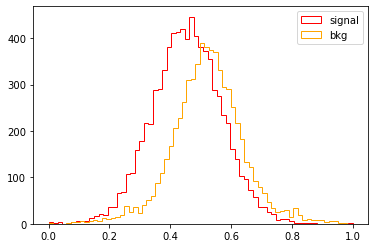

lepton3_eta


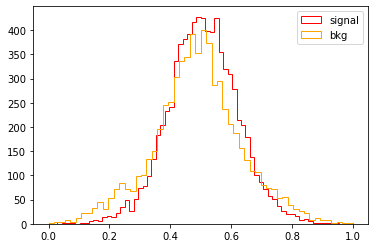

lepton1_phi


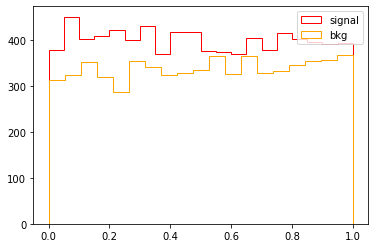

lepton2_phi


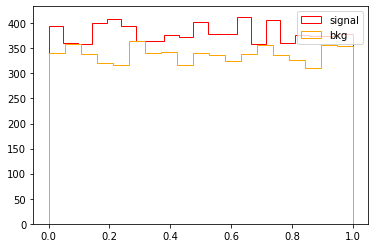

lepton3_phi


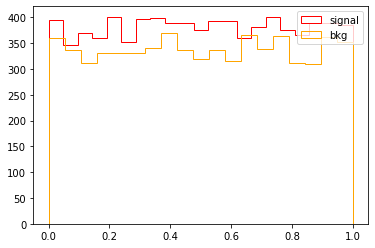

MET


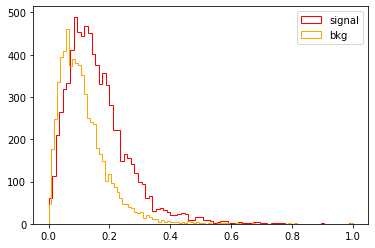

MET_phi


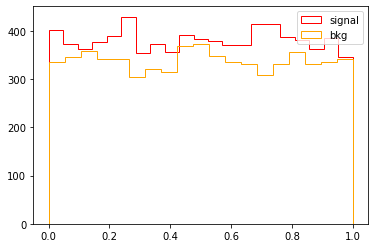

lepton1_flavor


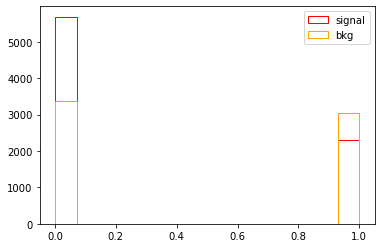

lepton2_flavor


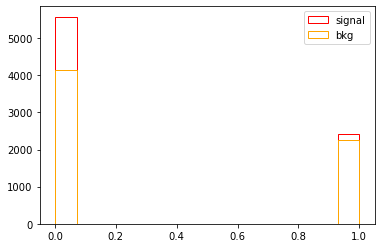

lepton3_flavor


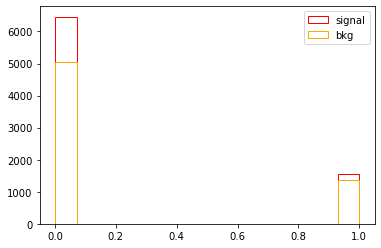

lepton1_charge


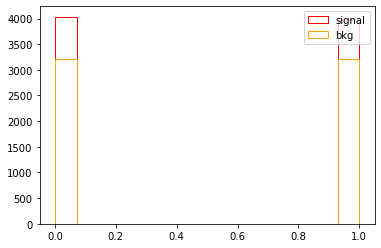

lepton2_charge


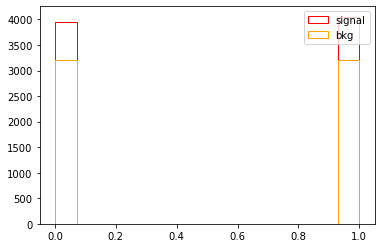

lepton3_charge


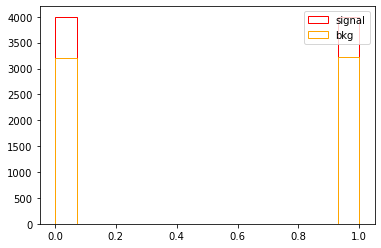

visible_pt


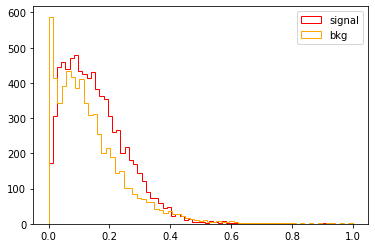

transverse_mass


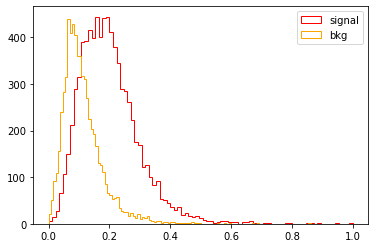

dilep_mass


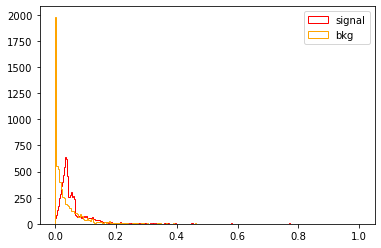

dilep_DR


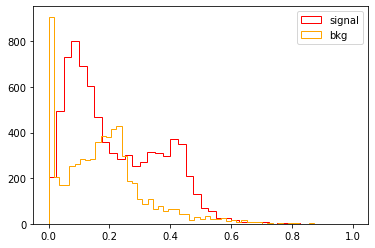

signal


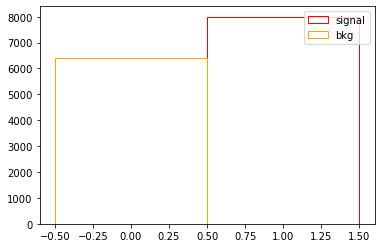

In [66]:
#Plot 80% of new df_train set
for var in df_train.columns:
    print (var)
    plt.figure()
    plt.hist(df_norm_sig.iloc[:n_sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
    plt.hist(df_norm_bkg.iloc[:n_bkg][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

lepton1_pt


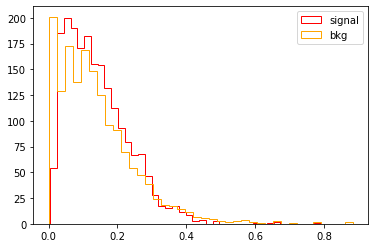

lepton2_pt


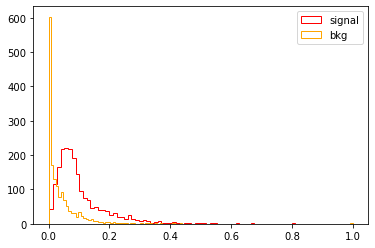

lepton3_pt


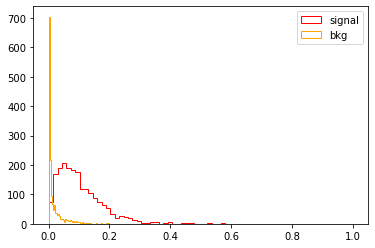

lepton1_eta


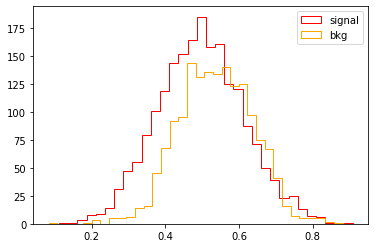

lepton2_eta


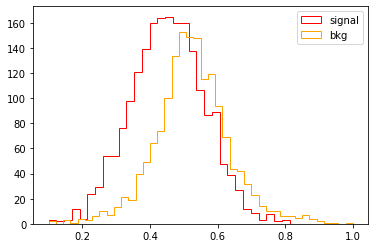

lepton3_eta


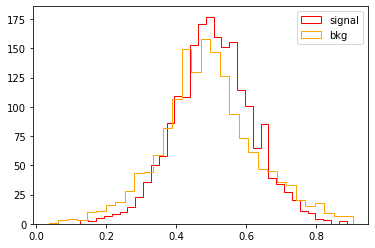

lepton1_phi


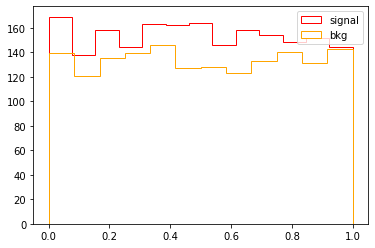

lepton2_phi


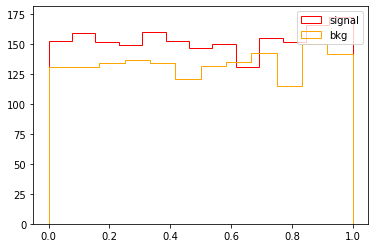

lepton3_phi


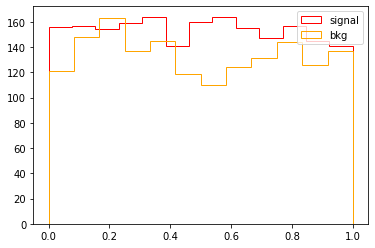

MET


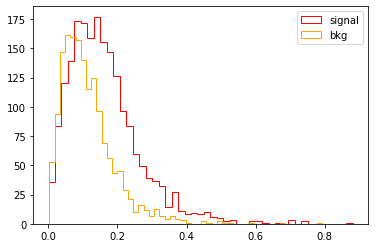

MET_phi


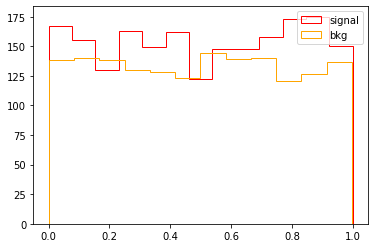

lepton1_flavor


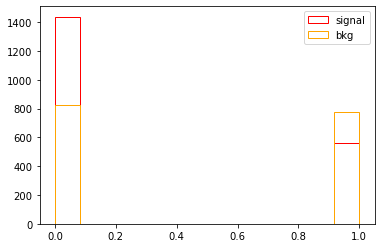

lepton2_flavor


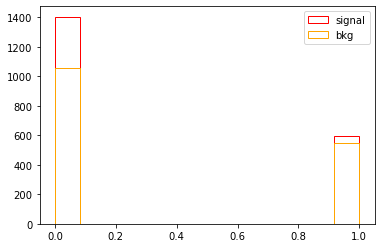

lepton3_flavor


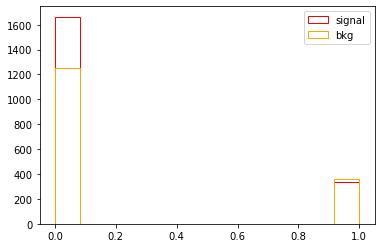

lepton1_charge


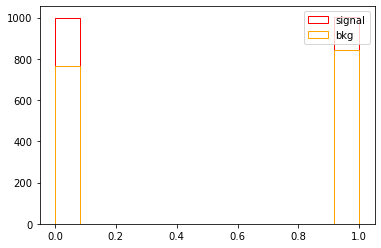

lepton2_charge


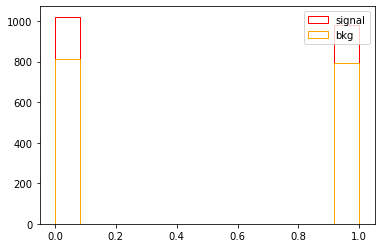

lepton3_charge


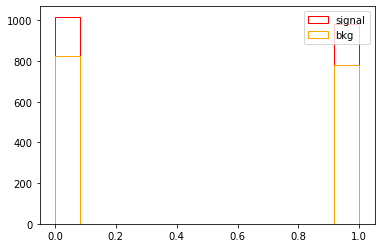

visible_pt


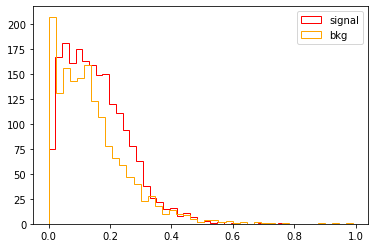

transverse_mass


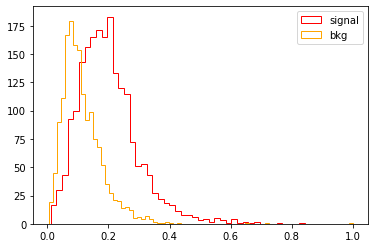

dilep_mass


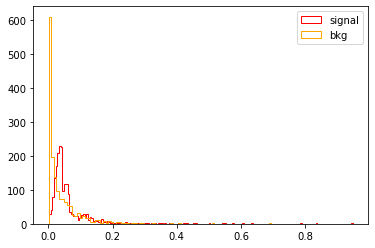

dilep_DR


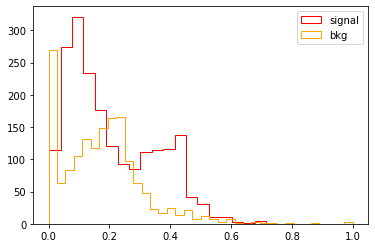

signal


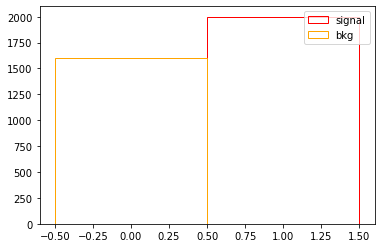

In [67]:
#Plot other 20% of df_train set
for var in df_train.columns:
    print (var)
    plt.figure()
    plt.hist(df_norm_sig.iloc[n_sig:][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
    plt.hist(df_norm_bkg.iloc[n_bkg:][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [68]:
print (np.shape(x_train))
print (np.shape(y_test))

(14419, 21)
(3605,)


In [69]:
x_train

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR
0,0.079118,0.030096,0.048094,0.261783,0.222712,0.545924,0.216958,0.329714,0.651352,0.113398,...,0.0,0.0,0.0,1.0,0.0,0.0,0.087769,0.160738,0.019274,0.106381
1,0.034887,0.003887,0.000633,0.634629,0.658448,0.622240,0.351335,0.717134,0.728101,0.125651,...,1.0,0.0,0.0,0.0,0.0,1.0,0.033437,0.067282,0.000357,0.005256
2,0.103424,0.163220,0.024674,0.537462,0.475034,0.660093,0.066354,0.036240,0.320286,0.274338,...,0.0,0.0,0.0,1.0,0.0,1.0,0.185237,0.238022,0.015624,0.032817
3,0.166889,0.175699,0.072920,0.586769,0.550386,0.532571,0.579311,0.551837,0.035614,0.280082,...,1.0,1.0,0.0,1.0,0.0,1.0,0.244190,0.290505,0.021968,0.035087
4,0.028221,0.015736,0.034361,0.499739,0.490692,0.521305,0.481176,0.476798,0.943131,0.190727,...,1.0,1.0,0.0,1.0,0.0,1.0,0.029652,0.089345,0.000807,0.003173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14414,0.162535,0.061832,0.033242,0.430562,0.337836,0.483576,0.598619,0.202406,0.878496,0.258087,...,0.0,0.0,0.0,0.0,1.0,1.0,0.148289,0.241963,0.103303,0.361292
14415,0.043344,0.092709,0.044313,0.552986,0.554126,0.481063,0.693443,0.133380,0.093166,0.024762,...,0.0,0.0,0.0,1.0,0.0,1.0,0.018149,0.034904,0.068049,0.397275
14416,0.108121,0.011860,0.012289,0.496023,0.574154,0.435782,0.124329,0.295218,0.829001,0.107675,...,1.0,0.0,1.0,0.0,1.0,0.0,0.114004,0.072621,0.001492,0.145227
14417,0.087332,0.042123,0.084895,0.580416,0.458185,0.484840,0.125787,0.614030,0.021891,0.094680,...,0.0,0.0,0.0,1.0,0.0,0.0,0.086563,0.095648,0.067908,0.444076


In [70]:
#Running Theano on cpu's ? 
import os 
#print ("Using Queue:", os.environ["SLURM_JOB_PARTITION"])
#gpuid=int(os.environ["SLURM_JOB_PARTITION"][3:4])
#print ("Using GPU:", gpuid)
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True"

In [71]:
#importing keras packages and begin network
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

#Defining sequential or linearly stack layers as model
#Adding 5 dense layers to network
model = Sequential()
model.add(Dense(17, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [72]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 17)                374       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                576       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [73]:
history = model.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=30, batch_size=128)

Epoch 1/30
113/113 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.5530 - val_loss: 0.6191 - val_accuracy: 0.5548
Epoch 2/30
113/113 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.7597 - val_loss: 0.4640 - val_accuracy: 0.8571
Epoch 3/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8581 - val_loss: 0.3204 - val_accuracy: 0.8779
Epoch 4/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8743 - val_loss: 0.2951 - val_accuracy: 0.8877
Epoch 5/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8781 - val_loss: 0.2930 - val_accuracy: 0.8907
Epoch 6/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.8845 - val_loss: 0.2808 - val_accuracy: 0.8949
Epoch 7/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8822 - val_loss: 0.2851 - val_accuracy: 0.8907
Epoch 

In [74]:
model.metrics_names
model.evaluate(x_test.values,y_test.values,batch_size=32)

113/113 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.9129


[0.23765155673027039, 0.9128987789154053]

In [75]:
y_predit = model.predict(x_test.values, batch_size=32)

7999.0
2000.0


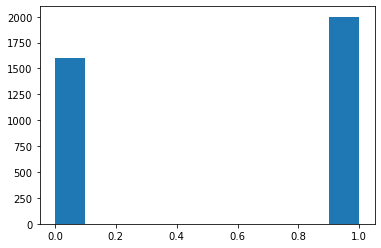

In [76]:
#this is the number of signal events in the training and test dataset
print (y_train.sum())
print (y_test.sum())

plt.figure()
plt.hist(y_test)
plt.show()

[[0.8776878 ]
 [0.08338225]
 [0.7761638 ]
 ...
 [0.7930809 ]
 [0.76974213]
 [0.13518497]]


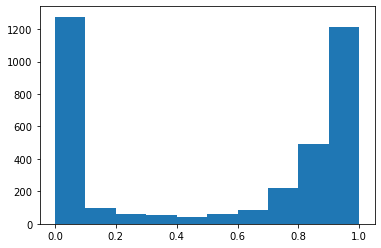

In [77]:
print (y_predit)

plt.figure()
plt.hist(y_predit)
plt.show()

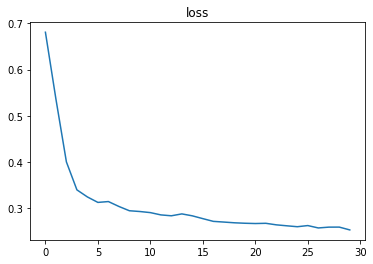

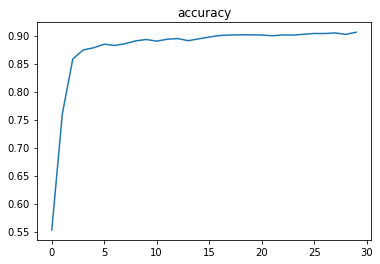

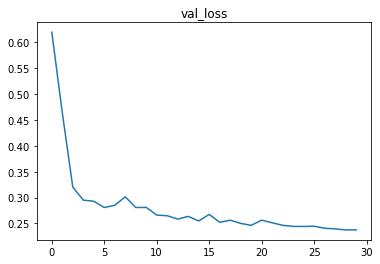

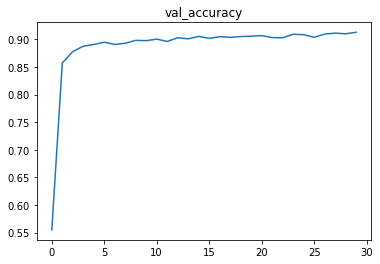

In [78]:
for u in history.history:
    plt.figure()
    plt.plot(history.history[u])
    plt.title(u)

In [79]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

y_predit = model.predict(x_test.values).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_predit)

auc_model = auc(fpr_keras, tpr_keras)

Before: AUC = .956


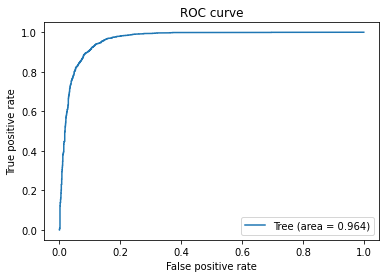

In [119]:
print('Before: AUC = .956')
plt.figure()

plt.plot(fpr_keras, tpr_keras, label='Tree (area = {:.3f})'.format(auc_model))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [81]:
roc_curve_spread = {"sig500":.933,"sig600":.926,"sig700":.954,"sig800":.954,"sig1000":.950}

In [82]:
#end of model

In [83]:
#test 2: splitting same csv's into test/train by combining even/odd entry indices. Each file is 1/2 sig + 1/2 bkg

df_train = pd.concat([df_norm_bkg.iloc[::2],df_norm_sig.iloc[::2]])
df_test =  pd.concat([df_norm_bkg.iloc[1::2],df_norm_sig.iloc[1::2]])

#df_train = pd.concat([df_norm_bkg.iloc[[i%2==1 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==0 for i in range(len(df_norm_sig))]]])
#df_test =  pd.concat([df_norm_bkg.iloc[[i%2==0 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==1 for i in range(len(df_norm_sig))]]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)

x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)

x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)

In [84]:
df_train

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
2082,0.064795,0.029334,0.053712,0.259364,0.624938,0.376400,0.949619,0.078397,0.839512,0.153540,...,0.0,0.0,0.0,0.0,1.0,0.087894,0.192317,0.018691,0.131455,1.0
1590,0.118636,0.000542,0.000504,0.441421,0.497532,0.465401,0.519857,0.962978,0.962662,0.150915,...,0.0,0.0,0.0,0.0,1.0,0.120603,0.105784,0.000334,0.001782,0.0
670,0.097186,0.034297,0.005070,0.605476,0.552768,0.494102,0.609679,0.962210,0.951335,0.048586,...,1.0,1.0,1.0,0.0,1.0,0.084713,0.049621,0.043404,0.170234,0.0
6122,0.325833,0.196393,0.077574,0.549390,0.537382,0.569178,0.835270,0.356261,0.877195,0.108118,...,1.0,0.0,0.0,1.0,1.0,0.271141,0.225176,0.019592,0.051481,1.0
86,0.039485,0.017694,0.018030,0.595768,0.557778,0.447031,0.173284,0.298569,0.560036,0.179988,...,0.0,0.0,1.0,0.0,0.0,0.046846,0.126582,0.011520,0.113348,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6604,0.101520,0.036630,0.042351,0.651729,0.509133,0.469089,0.628310,0.819015,0.819093,0.072775,...,0.0,1.0,0.0,0.0,1.0,0.128189,0.085620,0.047907,0.179105,0.0
1528,0.121278,0.018700,0.006891,0.486992,0.538712,0.303277,0.286137,0.120372,0.952734,0.091899,...,0.0,0.0,1.0,1.0,1.0,0.131451,0.076034,0.000350,0.016168,0.0
2896,0.060955,0.022134,0.015324,0.569631,0.560625,0.558499,0.653009,0.019006,0.721777,0.043236,...,0.0,0.0,1.0,0.0,0.0,0.060841,0.038982,0.037737,0.330558,1.0
7444,0.183091,0.038454,0.022105,0.620192,0.323524,0.421741,0.756880,0.385095,0.977176,0.065191,...,0.0,1.0,0.0,1.0,0.0,0.182575,0.136190,0.156921,0.474481,1.0


In [85]:
df_test

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
5335,0.159836,0.043132,0.038576,0.467067,0.526481,0.430567,0.497438,0.091468,0.966972,0.393254,...,1.0,1.0,1.0,0.0,1.0,0.120456,0.229995,0.075170,0.209003,0.0
6413,0.162385,0.250998,0.066031,0.373441,0.437255,0.607105,0.150355,0.705908,0.555442,0.061659,...,0.0,0.0,1.0,0.0,1.0,0.060302,0.156420,0.225222,0.415477,1.0
7957,0.061234,0.001573,0.000933,0.514612,0.613453,0.577767,0.246335,0.277881,0.276476,0.050523,...,0.0,0.0,0.0,0.0,1.0,0.064239,0.030148,0.005084,0.149615,0.0
5473,0.078056,0.068408,0.123796,0.265192,0.433744,0.468114,0.982956,0.157123,0.549523,0.032459,...,1.0,0.0,0.0,0.0,1.0,0.077047,0.087283,0.089560,0.447600,1.0
3173,0.058087,0.059984,0.030484,0.484174,0.475144,0.543212,0.594198,0.904035,0.443254,0.197070,...,0.0,0.0,0.0,1.0,1.0,0.058860,0.146117,0.052410,0.278374,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,0.144600,0.062817,0.073584,0.538018,0.363929,0.604969,0.874690,0.430171,0.657295,0.161911,...,1.0,1.0,0.0,1.0,1.0,0.130807,0.170783,0.118567,0.433750,1.0
6259,0.018064,0.018275,0.026595,0.259626,0.497262,0.303614,0.317024,0.198479,0.842838,0.118304,...,0.0,0.0,1.0,0.0,0.0,0.022221,0.096983,0.035785,0.373272,1.0
6489,0.146863,0.146110,0.008552,0.681822,0.466125,0.229961,0.056991,0.505283,0.485813,0.096192,...,1.0,0.0,1.0,0.0,1.0,0.051380,0.265985,0.005224,0.326287,0.0
7421,0.146685,0.005144,0.001036,0.392080,0.605068,0.375103,0.715366,0.434035,0.623722,0.198317,...,0.0,0.0,0.0,0.0,0.0,0.149421,0.180640,0.020486,0.319064,0.0


In [86]:
test_array = df_test[variable].reset_index(drop=True)
test_array["signal"] = 1

In [87]:
test_array

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,0.159836,0.043132,0.038576,0.467067,0.526481,0.430567,0.497438,0.091468,0.966972,0.393254,...,1.0,1.0,1.0,0.0,1.0,0.120456,0.229995,0.075170,0.209003,1
1,0.162385,0.250998,0.066031,0.373441,0.437255,0.607105,0.150355,0.705908,0.555442,0.061659,...,0.0,0.0,1.0,0.0,1.0,0.060302,0.156420,0.225222,0.415477,1
2,0.061234,0.001573,0.000933,0.514612,0.613453,0.577767,0.246335,0.277881,0.276476,0.050523,...,0.0,0.0,0.0,0.0,1.0,0.064239,0.030148,0.005084,0.149615,1
3,0.078056,0.068408,0.123796,0.265192,0.433744,0.468114,0.982956,0.157123,0.549523,0.032459,...,1.0,0.0,0.0,0.0,1.0,0.077047,0.087283,0.089560,0.447600,1
4,0.058087,0.059984,0.030484,0.484174,0.475144,0.543212,0.594198,0.904035,0.443254,0.197070,...,0.0,0.0,0.0,1.0,1.0,0.058860,0.146117,0.052410,0.278374,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,0.144600,0.062817,0.073584,0.538018,0.363929,0.604969,0.874690,0.430171,0.657295,0.161911,...,1.0,1.0,0.0,1.0,1.0,0.130807,0.170783,0.118567,0.433750,1
9007,0.018064,0.018275,0.026595,0.259626,0.497262,0.303614,0.317024,0.198479,0.842838,0.118304,...,0.0,0.0,1.0,0.0,0.0,0.022221,0.096983,0.035785,0.373272,1
9008,0.146863,0.146110,0.008552,0.681822,0.466125,0.229961,0.056991,0.505283,0.485813,0.096192,...,1.0,0.0,1.0,0.0,1.0,0.051380,0.265985,0.005224,0.326287,1
9009,0.146685,0.005144,0.001036,0.392080,0.605068,0.375103,0.715366,0.434035,0.623722,0.198317,...,0.0,0.0,0.0,0.0,0.0,0.149421,0.180640,0.020486,0.319064,1


In [88]:
df_x_test = df_test[variable].reset_index(drop=True)
df_y_test = df_test["signal"].reset_index(drop=True)

In [89]:
df_y_test

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9006    1.0
9007    1.0
9008    0.0
9009    0.0
9010    1.0
Name: signal, Length: 9011, dtype: float64

0.9662951782779288


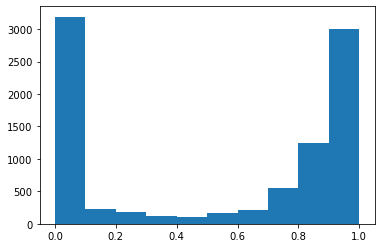

In [90]:
test_predict = model.predict(df_x_test.values).ravel()
fpr_, tpr_, thresholds_ = roc_curve(df_y_test, test_predict)
auc_test = auc(fpr_, tpr_)
print (auc_test)
plt.figure()
plt.hist(test_predict)
plt.show()

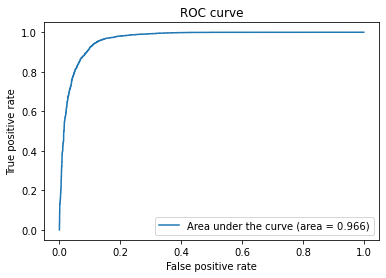

In [91]:
plt.figure()

plt.plot(fpr_, tpr_, label='Area under the curve (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [92]:
### Beginning of DT ###
#from sklearn import tree


#n_bkg = round(4010*80/100)
#n_sig = round(5000*80/100)
#n_bkg = round(8026*80/100)
#n_sig = round(10000*80/100)


#df_train = pd.concat([df_sig.iloc[:n_sig],df_bkg.iloc[:n_bkg]])
#df_test =  pd.concat([df_sig.iloc[n_sig:],df_bkg.iloc[n_bkg:]])

#df_train = sklearn.utils.shuffle(df_train)
#df_test = sklearn.utils.shuffle(df_test)

#x_train = df_train[variable].reset_index(drop=True)
#y_train = df_train["signal"].reset_index(drop=True)

#x_test = df_test[variable].reset_index(drop=True)
#y_test = df_test["signal"].reset_index(drop=True)

In [93]:
#end test predict for 50:50 test:train

In [94]:
#Decision tree for lower level variables above - refer to DecisionTree-higherLevelVar for higher level DT

In [95]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train,y_train)

In [96]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#y_predict_tree = tree_model.predict(x_test)
y_predict_tree = tree_model.predict_proba(x_test)[:,1]
fpr,tpr,t = roc_curve(y_test,y_predict_tree)
auc_tree = auc(fpr,tpr)

In [97]:
y_test

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9006    1.0
9007    1.0
9008    0.0
9009    0.0
9010    1.0
Name: signal, Length: 9011, dtype: float64

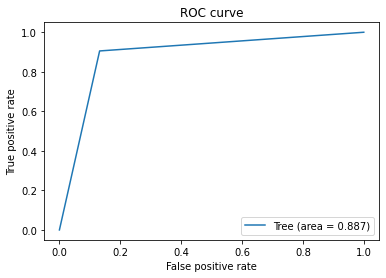

In [98]:
print('Before: AUC = .837')

plt.figure()

plt.plot(fpr, tpr, label='Tree (area = {:.3f})'.format(auc_tree))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [99]:
#from https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

GDC = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train, y_train)
GDC.score(x_test,y_test)

0.9578293197203418

Before: AUC = .947


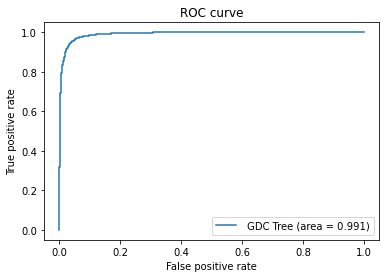

In [118]:
y_predict_gdc = GDC.predict_proba(x_test)[:,1]
fpr_gdc,tpr_gdc,t = roc_curve(y_test,y_predict_gdc)
auc_gdc = auc(fpr_gdc,tpr_gdc)
print('Before: AUC = .947')
plt.figure()

plt.plot(fpr_gdc, tpr_gdc, label=' GDC Tree (area = {:.3f})'.format(auc_gdc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [101]:
from sklearn.ensemble import ExtraTreesClassifier 

tree_2 = ExtraTreesClassifier(verbose=1,n_estimators=50)

In [102]:
tree_2.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


ExtraTreesClassifier(n_estimators=50, verbose=1)

In [103]:
tree_2.score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


0.9315281322827655

In [104]:
#End of DT - Begin new model1 

In [105]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

model1 = Sequential()
model1.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model1.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model1.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [106]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 15)                330       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [107]:
history1 = model1.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=50, batch_size=32)

Epoch 1/50
282/282 [==============================] - 1s 2ms/step - loss: 0.6101 - accuracy: 0.6522 - val_loss: 0.4491 - val_accuracy: 0.8180
Epoch 2/50
282/282 [==============================] - 1s 2ms/step - loss: 0.3743 - accuracy: 0.8522 - val_loss: 0.3372 - val_accuracy: 0.8624
Epoch 3/50
282/282 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8676 - val_loss: 0.3187 - val_accuracy: 0.8724
Epoch 4/50
282/282 [==============================] - 1s 2ms/step - loss: 0.3110 - accuracy: 0.8791 - val_loss: 0.3027 - val_accuracy: 0.8807
Epoch 5/50
282/282 [==============================] - 1s 2ms/step - loss: 0.3004 - accuracy: 0.8838 - val_loss: 0.2927 - val_accuracy: 0.8827
Epoch 6/50
282/282 [==============================] - 1s 2ms/step - loss: 0.2934 - accuracy: 0.8872 - val_loss: 0.2909 - val_accuracy: 0.8859
Epoch 7/50
282/282 [==============================] - 1s 2ms/step - loss: 0.2860 - accuracy: 0.8899 - val_loss: 0.2803 - val_accuracy: 0.8871
Epoch 

In [108]:
model1.metrics_names
model1.evaluate(x_test.values,y_test.values,batch_size=32)

282/282 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9177


[0.20269396901130676, 0.9176561832427979]

In [109]:
y_predict1 = model1.predict(x_test.values, batch_size=32)

[[4.6107501e-02]
 [9.7332060e-01]
 [6.7502260e-04]
 ...
 [8.3489025e-01]
 [5.7643596e-05]
 [9.8679852e-01]]


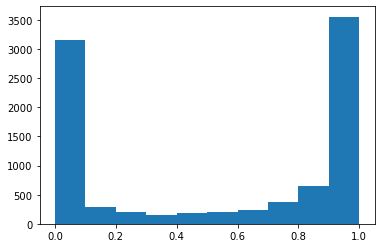

In [110]:
print (y_predict1)

plt.figure()
plt.hist(y_predict1)
plt.show()

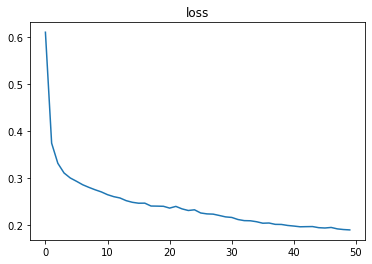

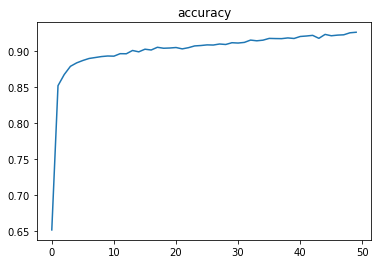

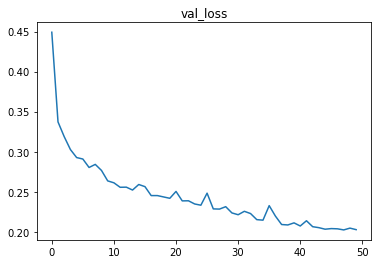

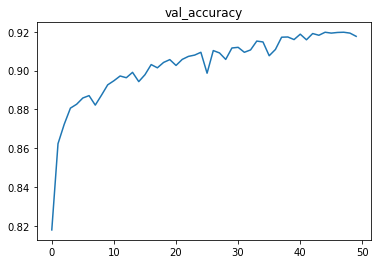

In [111]:
for u in history1.history:
    plt.figure()
    plt.plot(history1.history[u])
    plt.title(u)

In [112]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predict1)

auc_model1 = auc(fpr_1, tpr_1)

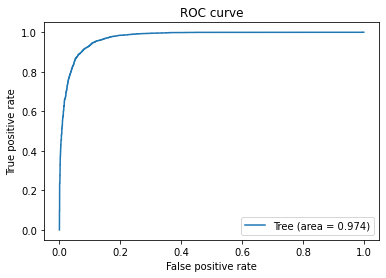

In [113]:
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [114]:
###Stochastic Gradient Decent###
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge")
clf.fit(x_train,y_train)
#x_test["signal"] = 1

SGDClassifier()

In [115]:
y_test

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9006    1.0
9007    1.0
9008    0.0
9009    0.0
9010    1.0
Name: signal, Length: 9011, dtype: float64

Index(['lepton1_pt', 'lepton2_pt', 'lepton3_pt', 'lepton1_eta', 'lepton2_eta',
       'lepton3_eta', 'lepton1_phi', 'lepton2_phi', 'lepton3_phi', 'MET',
       'MET_phi', 'lepton1_flavor', 'lepton2_flavor', 'lepton3_flavor',
       'lepton1_charge', 'lepton2_charge', 'lepton3_charge', 'visible_pt',
       'transverse_mass', 'dilep_mass', 'dilep_DR'],
      dtype='object')


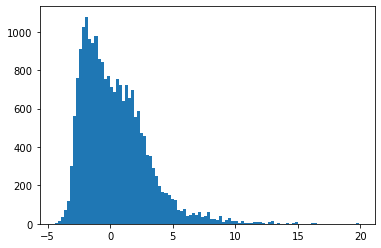

In [116]:
print(x_test.columns)
plt.hist(clf.decision_function(x_test[x_test.values == 1]),bins='auto')
#plt.hist(clf.decision_function(x_test[x_test.signal == 1]),bins='auto')
plt.show()

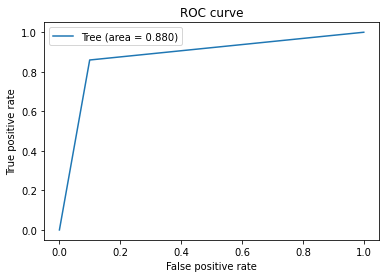

In [117]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predit1 = clf.predict(x_test)

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predit1)


auc_model1 = auc(fpr_1, tpr_1)
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()